Telecom-Churn-Prediction-Logistic-Regression

In [114]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statsmodels.api as smd
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
ch_data= pd.read_csv('churn_data.csv')
ch_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [116]:
cust_data= pd.read_csv("customer_data.csv")
cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [117]:
int_data = pd.read_csv("internet_data.csv")
int_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


Merge the Input Datasets into one based on "customerId"

In [118]:
# Merging on 'customerID'
df= pd.merge(ch_data, cust_data, how='inner', on='customerID')

In [119]:
# Final dataframe with all predictor variables
telecom=pd.merge(df, int_data, how='inner', on='customerID')

In [120]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [121]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [122]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [123]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [124]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


Data-Preprocessing

In [125]:
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [126]:
value = telecom['MonthlyCharges'] * telecom['tenure']

In [127]:
telecom['TotalCharges'] = value.where(telecom['TotalCharges'] == np.nan, other=telecom['TotalCharges'])


In [128]:
telecom['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

EDA-(Exploratory Data Analysis)

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

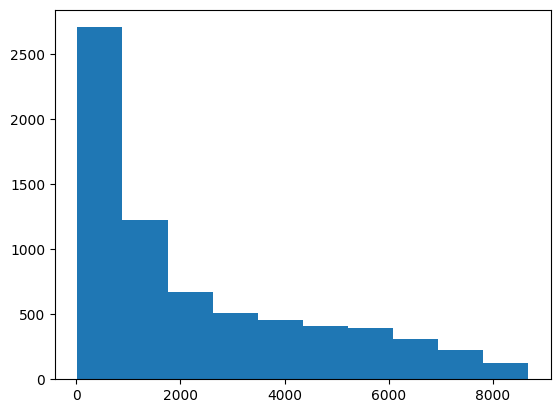

In [129]:
# Distribution of Total Charges Field

plt.hist(telecom['TotalCharges'])

In [130]:
print(telecom['Churn'].isnull().sum())

0


In [131]:
pip install --upgrade matplotlib seaborn

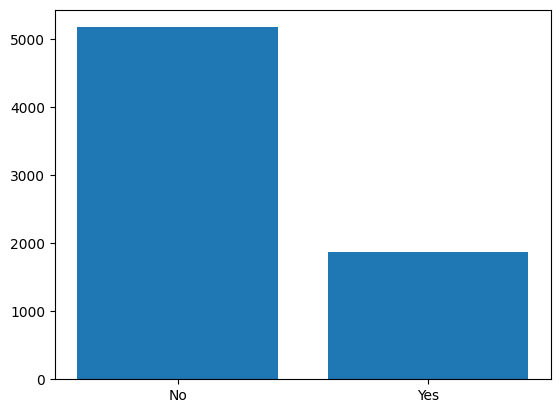

In [132]:
import matplotlib.pyplot as plt

plt.bar(telecom['Churn'].value_counts().index, telecom['Churn'].value_counts())
plt.show()

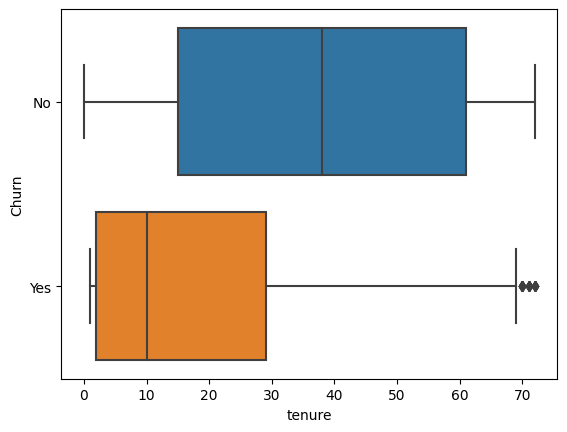

In [133]:
sns.boxplot(x = 'tenure', y = 'Churn', data = telecom)
plt.show()

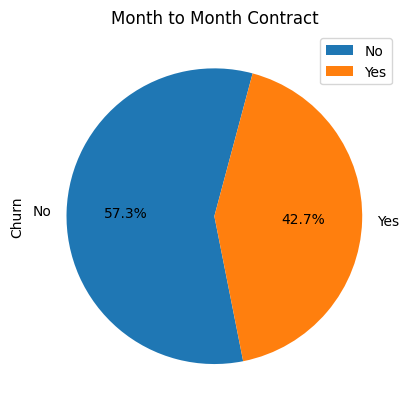

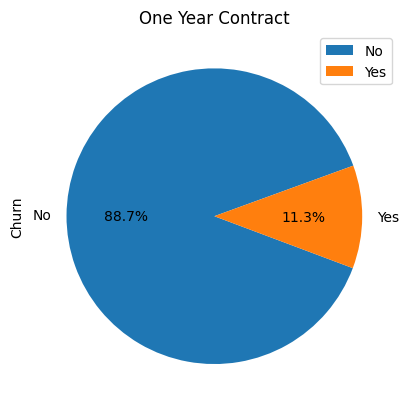

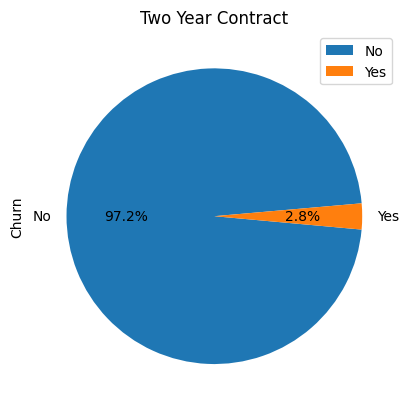

In [134]:
pie_Contract_m2m = pd.DataFrame(telecom[telecom['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(telecom[telecom['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(telecom[telecom['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

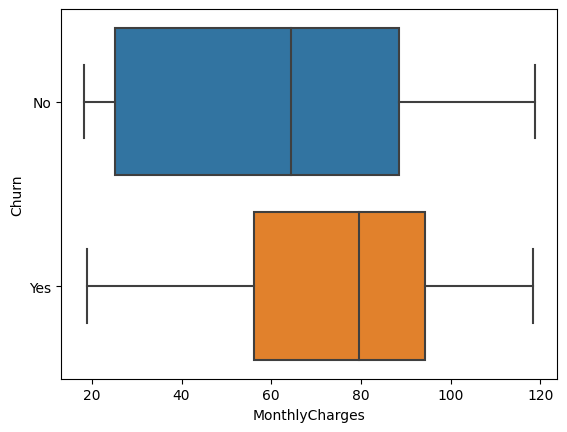

In [135]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = telecom)
plt.show()

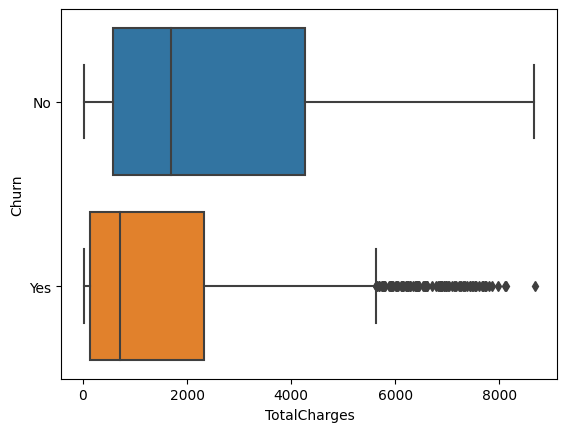

In [136]:
sns.boxplot(x = 'TotalCharges', y = 'Churn', data = telecom)
plt.show()

<Figure size 1500x500 with 0 Axes>

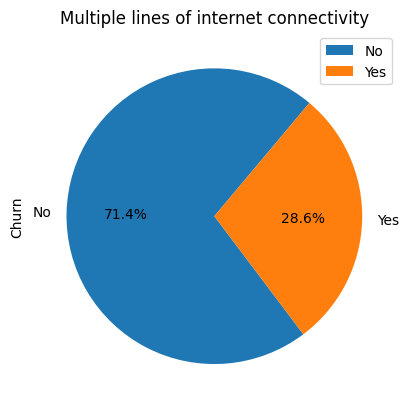

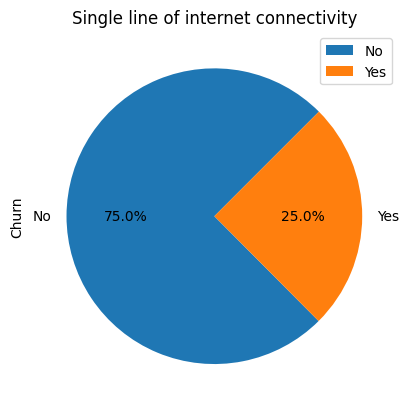

In [137]:
plt.figure(figsize=(15,5))
pie_MultipleLines_Y = pd.DataFrame(telecom[telecom['MultipleLines'] == 'Yes']['Churn'].value_counts())
pie_MultipleLines_Y.plot.pie(subplots = True,  labels = pie_MultipleLines_Y.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Multiple lines of internet connectivity')
plt.gca().set_aspect('equal')

pie_MultipleLines_N = pd.DataFrame(telecom[telecom['MultipleLines'] == 'No']['Churn'].value_counts())
pie_MultipleLines_N.plot.pie(subplots = True,  labels = pie_MultipleLines_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Single line of internet connectivity')

plt.gca().set_aspect('equal')
plt.show()

<Figure size 1500x500 with 0 Axes>

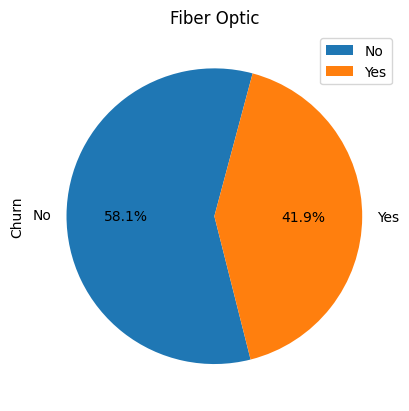

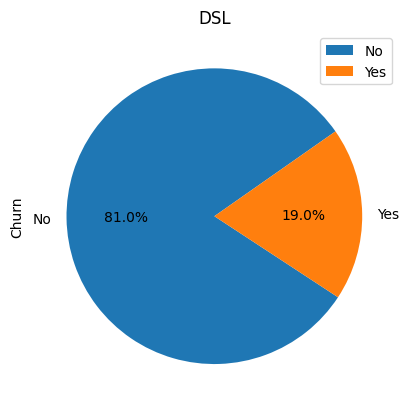

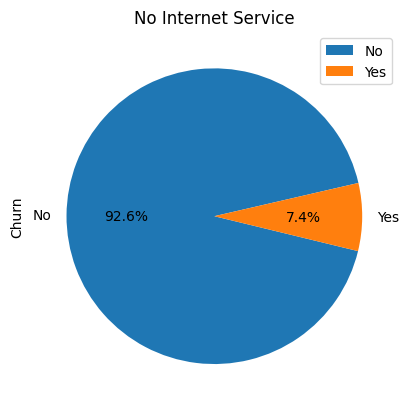

In [138]:
plt.figure(figsize=(15,5))
pie_InternetService_fo = pd.DataFrame(telecom[telecom['InternetService'] == "Fiber optic"]['Churn'].value_counts())
pie_InternetService_fo.plot.pie(subplots = True, labels = pie_InternetService_fo.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Fiber Optic')
plt.gca().set_aspect('equal')

pie_InternetService_dsl = pd.DataFrame(telecom[telecom['InternetService'] == "DSL"]['Churn'].value_counts())
pie_InternetService_dsl.plot.pie(subplots = True, labels = pie_InternetService_dsl.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('DSL')
plt.gca().set_aspect('equal')

pie_InternetService_no = pd.DataFrame(telecom[telecom['InternetService'] == "No"]['Churn'].value_counts())
pie_InternetService_no.plot.pie(subplots = True, labels = pie_InternetService_no.index.values, autopct='%1.1f%%', startangle= 13)
plt.title('No Internet Service')
plt.gca().set_aspect('equal')

plt.show()

Data Pre-Processing

In [139]:
# List of variables to map

variablelist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[variablelist] = telecom[variablelist].apply(binary_map)

In [140]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [141]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummies = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummies], axis=1)

In [142]:
 # We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [143]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service

In [146]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [147]:
# Checking percentage of missing values after removing the missing values
round(100 * (telecom.isnull().sum() / len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No phone service           0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No internet service       0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Train-Test-Split of dataset

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
# Putting feature variable to X
X = telecom.drop(['customerID'], axis=1)
y = X.pop('Churn')

In [150]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

Feature Scaling

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
1010,-1.201477,1,1,-0.483666,-0.937173,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2732,-1.160653,1,0,-1.472880,-0.966413,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
2940,0.839728,0,1,-0.340687,0.249914,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
859,1.615386,0,1,0.003460,1.071889,0,1,1,0,1,...,0,1,0,1,0,1,0,1,0,1
2895,0.186543,1,1,-1.491168,-0.691863,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0


In [153]:
# Check the corr values of final list of variables
correlation = telecom.corr()
correlation

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
tenure,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049,0.015683,0.381912,0.163386,0.202338,...,-0.037529,0.361138,-0.037529,0.361520,-0.037529,0.325288,-0.037529,0.280264,-0.037529,0.285402
PhoneService,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691,0.008392,0.018397,-0.001078,-0.003142,...,0.171817,-0.052133,0.171817,-0.070076,0.171817,-0.095138,0.171817,-0.021383,0.171817,-0.033477
PaperlessBilling,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454,0.156258,-0.013957,-0.110131,-0.052278,...,-0.320592,0.127056,-0.320592,0.104079,-0.320592,0.037536,-0.320592,0.224241,-0.320592,0.211583
MonthlyCharges,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858,0.219874,0.097825,-0.112343,0.004810,...,-0.763191,0.441529,-0.763191,0.482607,-0.763191,0.338301,-0.763191,0.629668,-0.763191,0.627235
TotalCharges,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484,0.102411,0.319072,0.064653,0.170569,...,-0.374878,0.510100,-0.374878,0.522881,-0.374878,0.432868,-0.374878,0.515709,-0.374878,0.519867
Churn,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000,0.150541,-0.149982,-0.163128,-0.178225,...,-0.227578,-0.082307,-0.227578,-0.066193,-0.227578,-0.164716,-0.227578,0.063254,-0.227578,0.060860
SeniorCitizen,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541,1.000000,0.016957,-0.210550,-0.046491,...,-0.182519,0.066663,-0.182519,0.059514,-0.182519,-0.060577,-0.182519,0.105445,-0.182519,0.119842
Partner,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982,0.016957,1.000000,0.452269,0.083067,...,-0.000286,0.141849,-0.000286,0.153556,-0.000286,0.120206,-0.000286,0.124483,-0.000286,0.118108
Dependents,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128,-0.210550,0.452269,1.000000,0.069222,...,0.138383,0.023639,0.138383,0.013900,0.138383,0.063053,0.138383,-0.016499,0.138383,-0.038375
Contract_One year,0.202338,-0.003142,-0.052278,0.004810,0.170569,-0.178225,-0.046491,0.083067,0.069222,1.000000,...,0.038061,0.084113,0.038061,0.102911,0.038061,0.096258,0.038061,0.061930,0.038061,0.064780


In [154]:
# Find out the Fields with high correlation
correlated_features = set()
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > 0.7:
            colname1 = correlation.columns[i]
            colname2 = correlation.columns[j]
            print(abs(correlation.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.8258804609332019 -- 4 -- 0 -- TotalCharges -- tenure
0.7871948529419366 -- 15 -- 3 -- InternetService_Fiber optic -- MonthlyCharges
0.7631910615169536 -- 16 -- 3 -- InternetService_No -- MonthlyCharges
1.0000000000000002 -- 17 -- 1 -- MultipleLines_No phone service -- PhoneService
0.7631910615169536 -- 19 -- 3 -- OnlineSecurity_No internet service -- MonthlyCharges
1.0 -- 19 -- 16 -- OnlineSecurity_No internet service -- InternetService_No
0.7631910615169536 -- 21 -- 3 -- OnlineBackup_No internet service -- MonthlyCharges
1.0 -- 21 -- 16 -- OnlineBackup_No internet service -- InternetService_No
1.0 -- 21 -- 19 -- OnlineBackup_No internet service -- OnlineSecurity_No internet service
0.7631910615169536 -- 23 -- 3 -- DeviceProtection_No internet service -- MonthlyCharges
1.0 -- 23 -- 16 -- DeviceProtection_No internet service -- InternetService_No
1.0 -- 23 -- 19 -- DeviceProtection_No internet service -- OnlineSecurity_No internet service
1.0 -- 23 -- 21 -- DeviceProtection_No interne

In [155]:
print(correlation.columns)
print(correlated_features)

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')
{'StreamingMovies_No internet service', 'DeviceProtection_No internet service', 'OnlineBackup_No internet service', 'PhoneService', 'On

Drop the highy correlated values

In [156]:
X_test = X_test.drop(['TotalCharges', 'InternetService_Fiber optic', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'StreamingMovies_No internet service',
                'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'DeviceProtection_No internet service'], 1)
X_train = X_train.drop(['TotalCharges', 'InternetService_Fiber optic', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'StreamingMovies_No internet service',
                'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'DeviceProtection_No internet service'], 1)

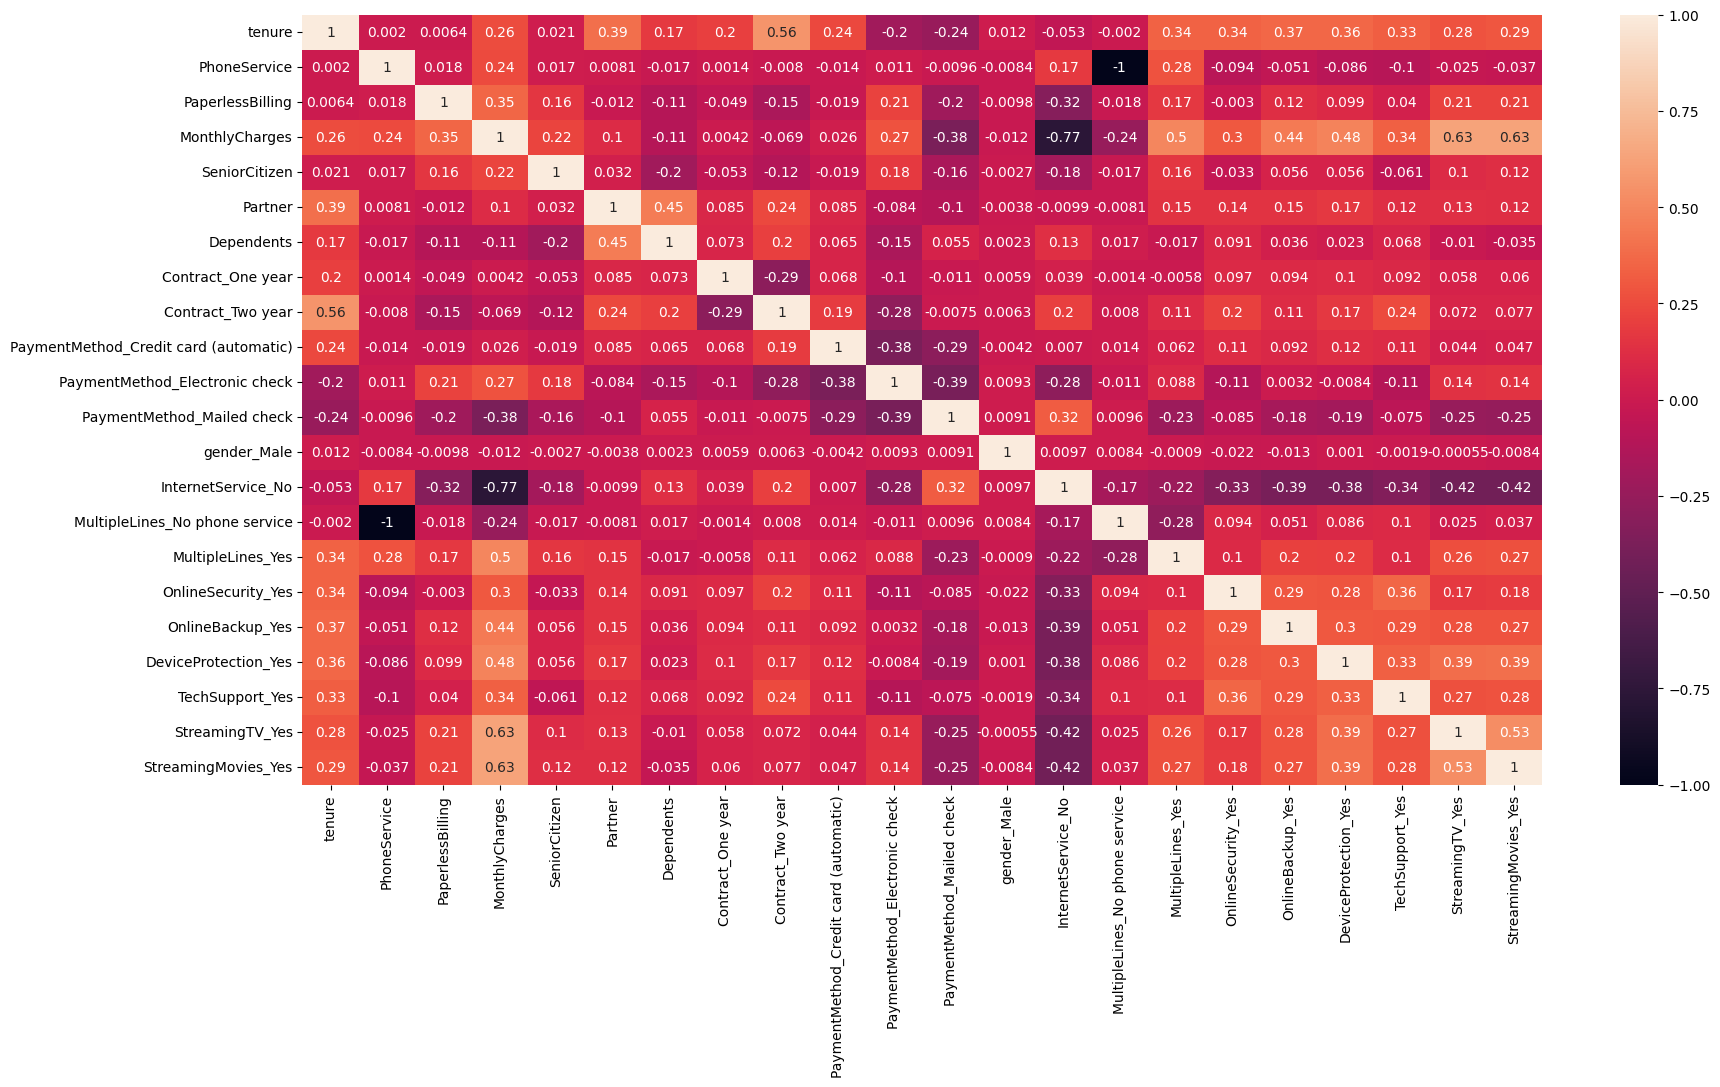

In [157]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

Create Logistic Regression Model

In [158]:
from statsmodels.tools import add_constant as add_constant
X_train_constant = add_constant(X_train)
X_train_constant.head()

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
1010,1.0,-1.201477,1,1,-0.483666,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2732,1.0,-1.160653,1,0,-1.472880,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2940,1.0,0.839728,0,1,-0.340687,1,0,0,0,0,...,1,0,1,0,0,1,1,0,1,1
859,1.0,1.615386,0,1,0.003460,0,1,1,0,1,...,1,0,1,0,1,1,1,1,1,1
2895,1.0,0.186543,1,1,-1.491168,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [159]:
cols = X_train_constant.columns
model = smd.Logit(y_train, X_train_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.408592
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5603
Method:                           MLE   Df Model:                           21
Date:                Sat, 30 Sep 2023   Pseudo R-squ.:                  0.2899
Time:                        03:55:20   Log-Likelihood:                -2298.3
converged:                       True   LL-Null:                       -3236.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3199   2.56e+06  -1.25e-07      1.000   -5.01e+06    5.01e+06
tenure                                   -0.8896      0.067    -13.376      0.000      -1.020      -0.759
PhoneService                             -0.6967   2.56e+06  -2.72e-07      1.000   -5.01e+06    5.01e+06
PaperlessBilling                          0.3552      0.084      4.238      0.000       0.191       0.519
MonthlyCharges                            1.0390      0.123      8.431      0.000       0.797       1.281
SeniorCitizen                             0.3519      0.096      3.663      0.000       0.164       0.540
Partner                                   0.0386      0.088      0.438      0.661      -0.134       0.211
Dependents                               -0.1641      0.101     -1.623      0.105      -0.362       0.034
Contract_One year                        -0.6258      0.119     -5.259      0.000      -0.859      -0.393
Contract_Two year                        -1.2666      0.203     -6.250      0.000      -1.664      -0.869
PaymentMethod_Credit card (automatic)    -0.1684      0.128     -1.315      0.188      -0.419       0.083
PaymentMethod_Electronic check            0.2035      0.106      1.915      0.056      -0.005       0.412
PaymentMethod_Mailed check               -0.1364      0.128     -1.068      0.286      -0.387       0.114
gender_Male                              -0.0335      0.073     -0.457      0.647      -0.177       0.110
InternetService_No                       -0.0831      0.212     -0.392      0.695      -0.499       0.333
MultipleLines_No phone service            0.3768   2.56e+06   1.47e-07      1.000   -5.01e+06    5.01e+06
MultipleLines_Yes                         0.0672      0.094      0.715      0.475      -0.117       0.251
OnlineSecurity_Yes                       -0.5836      0.097     -6.037      0.000      -0.773      -0.394
OnlineBackup_Yes                         -0.2893      0.088     -3.286      0.001      -0.462      -0.117
DeviceProtection_Yes                     -0.2004      0.091     -2.196      0.028      -0.379      -0.022
TechSupport_Yes                          -0.5656      0.096     -5.916      0.000      -0.753      -0.378
StreamingTV_Yes                          -0.0395      0.101     -0.390      0.696      -0.238       0.159
StreamingMovies_Yes                      -0.1012      0.101     -0.998      0.318      -0.300       0.097
=========================================================================================================
"""

Feature Selection: Drop Features with P-Value > 0.05

In [160]:
drop_columns= ['PhoneService', 'Partner', 'Dependents', 'PaymentMethod_Electronic check',
             'PaymentMethod_Mailed check', 'gender_Male', 'InternetService_No', 'MultipleLines_No phone service',
             'MultipleLines_Yes', 'DeviceProtection_Yes', 'StreamingTV_Yes']

In [161]:
X_train_constant.drop(drop_columns, axis=1, inplace=True)

In [162]:
model = smd.Logit(y_train, X_train_constant)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.415605
         Iterations 8


In [163]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5613
Method:                           MLE   Df Model:                           11
Date:                Sat, 30 Sep 2023   Pseudo R-squ.:                  0.2777
Time:                        03:55:20   Log-Likelihood:                -2337.8
converged:                       True   LL-Null:                       -3236.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0679      0.100    -10.645      0.000      -1.265      -0.871
tenure                                   -0.8721      0.061    -14.358      0.000      -0.991      -0.753
PaperlessBilling                          0.4417      0.082      5.361      0.000       0.280       0.603
MonthlyCharges                            0.8610      0.057     15.122      0.000       0.749       0.973
SeniorCitizen                             0.4673      0.093      5.008      0.000       0.284       0.650
Contract_One year                        -0.7712      0.116     -6.636      0.000      -0.999      -0.543
Contract_Two year                        -1.4860      0.199     -7.459      0.000      -1.876      -1.095
PaymentMethod_Credit card (automatic)    -0.2440      0.102     -2.381      0.017      -0.445      -0.043
OnlineSecurity_Yes                       -0.5334      0.095     -5.598      0.000      -0.720      -0.347
OnlineBackup_Yes                         -0.2050      0.087     -2.357      0.018      -0.376      -0.035
TechSupport_Yes                          -0.5438      0.095     -5.738      0.000      -0.730      -0.358
StreamingMovies_Yes                       0.0743      0.093      0.802      0.423      -0.107       0.256
=========================================================================================================
"""

In [164]:
columns_model = ['tenure', 'PaperlessBilling', 'MonthlyCharges',
             'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
             'PaymentMethod_Credit card (automatic)', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
             'TechSupport_Yes', 'StreamingMovies_Yes']

In [165]:
X_train1 = X_train_constant[columns_model]

In [166]:
logreg = LogisticRegression()
logreg.fit(X_train1, y_train)

LogisticRegression()

In [167]:
y_train_pred = logreg.predict(X_train1)

In [168]:
sklearn.metrics.accuracy_score(y_train, y_train_pred)

0.8051555555555555

<Axes: >

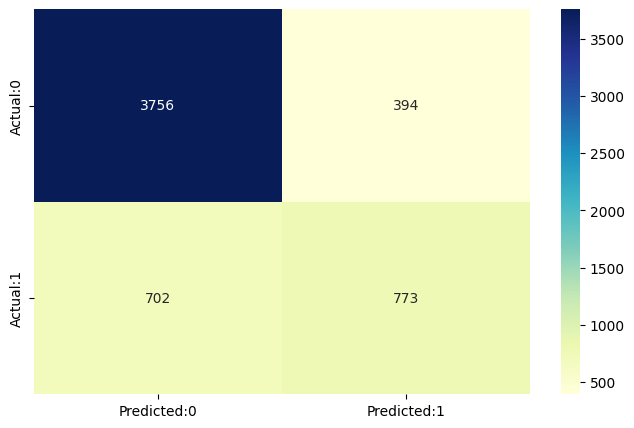

In [169]:
# Create the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [170]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [171]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Missclassifications = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity/Recall or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Precision/Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8051555555555555 
 Missclassifications = 1-Accuracy =  0.1948444444444445 
 Sensitivity/Recall or True Positive Rate = TP/(TP+FN) =  0.5240677966101694 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9050602409638554 
 Precision/Positive Predictive value = TP/(TP+FP) =  0.662382176520994 
 Negative predictive Value = TN/(TN+FN) =  0.8425302826379543 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  5.520003441452291 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.5258569339903613


[[0.62877082 0.37122918]
 [0.82750655 0.17249345]
 [0.7902645  0.2097355 ]
 ...
 [0.94411298 0.05588702]
 [0.88047238 0.11952762]
 [0.91472292 0.08527708]]
Logistic: ROC AUC = 0.844


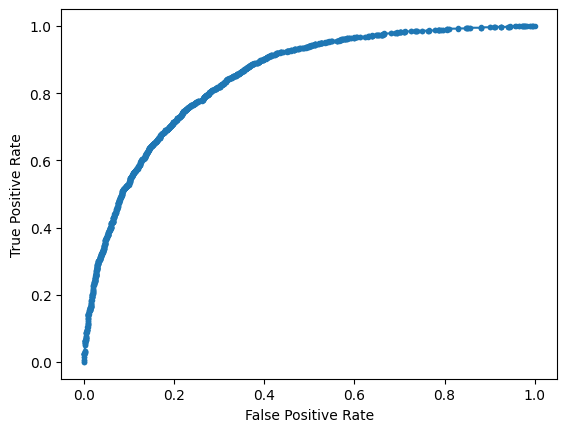

In [172]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
lor_probs = logreg.predict_proba(X_train1)
print(lor_probs)

# keep probabilities for the positive outcome only
lor_probs = lor_probs[:, 1]

# calculate scores
lor_auc = roc_auc_score(y_train, lor_probs)

# summarize scores
print('Logistic: ROC AUC = %.3f' % (lor_auc))

# calculate roc curves
lor_fpr, lor_tpr, _ = roc_curve(y_train, lor_probs)

plt.plot(lor_fpr, lor_tpr, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [173]:
pd.DataFrame(zip(lor_fpr, lor_tpr), columns=('FPR', 'TPR'))

,FPR,TPR
0,0.000000,0.000000
1,0.000000,0.000678
2,0.000000,0.005424
3,0.000241,0.005424
4,0.000241,0.015593
...,...,...
1620,0.993494,1.000000
1621,0.993976,1.000000
1622,0.996386,1.000000
1623,0.996867,1.000000


In [174]:
y_train_predict_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':lor_probs})
y_train_predict_final['CustID'] = y_train.index
y_train_predict_final.head(20)

,Churn,Churn_Prob,CustID
0,0,0.371229,1010
1,0,0.172493,2732
2,1,0.209736,2940
3,0,0.007179,859
4,0,0.055371,2895
5,0,0.005549,4573
6,0,0.004965,5897
7,0,0.276251,1188
8,0,0.052126,6571
9,1,0.131619,6515


In [175]:
y_train_predict_final['predicted'] = y_train_predict_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predict_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.371229,1010,0
1,0,0.172493,2732,0
2,1,0.209736,2940,0
3,0,0.007179,859,0
4,0,0.055371,2895,0


In [176]:
from sklearn import metrics
# Create Confusion matrix
confusion = metrics.confusion_matrix(y_train_predict_final.Churn, y_train_predict_final.predicted )
print(confusion)

[[3756  394]
 [ 702  773]]


In [177]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_predict_final.Churn, y_train_predict_final.predicted))

0.8051555555555555


In [178]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predict_final[i]= y_train_predict_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_predict_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.371229,1010,0,1,1,1,1,0,0,0,0,0,0
1,0,0.172493,2732,0,1,1,0,0,0,0,0,0,0,0
2,1,0.209736,2940,0,1,1,1,0,0,0,0,0,0,0
3,0,0.007179,859,0,1,0,0,0,0,0,0,0,0,0
4,0,0.055371,2895,0,1,0,0,0,0,0,0,0,0,0


In [179]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [180]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df1 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predict_final.Churn, y_train_predict_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df1)

     prob  accuracy     sensi     speci
0.0   0.0  0.262222  1.000000  0.000000
0.1   0.1  0.607467  0.943729  0.487952
0.2   0.2  0.703644  0.869153  0.644819
0.3   0.3  0.765867  0.755932  0.769398
0.4   0.4  0.795200  0.645424  0.848434
0.5   0.5  0.805156  0.524068  0.905060
0.6   0.6  0.797511  0.377627  0.946747
0.7   0.7  0.775289  0.192542  0.982410
0.8   0.8  0.747200  0.042034  0.997831
0.9   0.9  0.737778  0.000000  1.000000


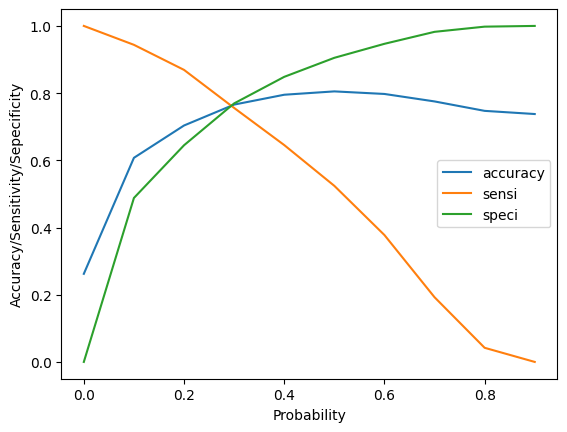

In [181]:
cutoff_df1.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xlabel('Probability')
plt.ylabel('Accuracy/Sensitivity/Sepecificity')
plt.show()

In [182]:
y_train_predict_final['final_predicted'] = y_train_predict_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_predict_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.371229,1010,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.172493,2732,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.209736,2940,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.007179,859,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.055371,2895,0,1,0,0,0,0,0,0,0,0,0,0


In [183]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_predict_final.Churn, y_train_predict_final.final_predicted)

0.7658666666666667

In [184]:
confusion7 = metrics.confusion_matrix(y_train_predict_final.Churn, y_train_predict_final.final_predicted )
confusion7

array([[3193,  957],
       [ 360, 1115]])

In [185]:
TP = confusion7[1,1] # true positive
TN = confusion7[0,0] # true negatives
FP = confusion7[0,1] # false positives
FN = confusion7[1,0] # false negatives

In [186]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7559322033898305

In [187]:
# Let us calculate specificity
TN / float(TN+FP)

0.7693975903614458

In [188]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23060240963855422


In [189]:
# Positive predictive value
print (TP / float(TP+FP))

0.5381274131274131


In [190]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8986771742189699


In [191]:
confusion = metrics.confusion_matrix(y_train_predict_final.Churn, y_train_predict_final.predicted )
confusion

array([[3756,  394],
       [ 702,  773]])

In [192]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.662382176520994

In [193]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5240677966101694

In [194]:
from sklearn.metrics import precision_score, recall_score

In [195]:
precision_score(y_train_predict_final.Churn, y_train_predict_final.predicted)

0.662382176520994

In [196]:
recall_score(y_train_predict_final.Churn, y_train_predict_final.predicted)

0.5240677966101694

In [197]:
from sklearn.metrics import precision_recall_curve

In [198]:
pd.DataFrame(zip(y_train_predict_final.Churn, y_train_predict_final.predicted))

,0,1
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
5620,0,0
5621,0,0
5622,0,0
5623,0,0


In [199]:
p, r, thresholds = precision_recall_curve(y_train_predict_final.Churn, y_train_predict_final.Churn_Prob)

In [200]:
pd.DataFrame(zip(p, r, thresholds), columns=('Precision', 'Recall', 'thesholds')).head(10)

,Precision,Recall,thesholds
0,0.262222,1.0,0.002463
1,0.262269,1.0,0.002748
2,0.262315,1.0,0.003493
3,0.262362,1.0,0.003565
4,0.262409,1.0,0.003593
5,0.262456,1.0,0.003595
6,0.262502,1.0,0.003703
7,0.262549,1.0,0.003800
8,0.262596,1.0,0.004170
9,0.262642,1.0,0.004193


Plotting the precision-recall curve

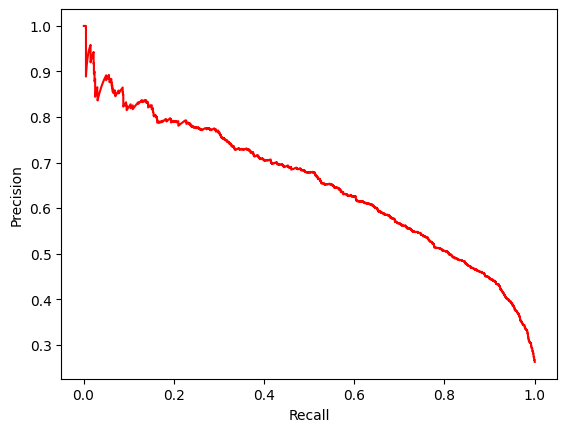

In [201]:
plt.plot(r[:-1], p[:-1], "r-")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Plotting the precision-recall curve against threshold

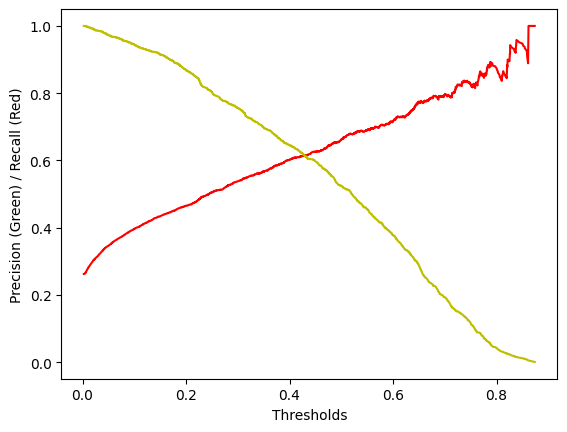

In [202]:
plt.plot(thresholds, p[:-1], "r-")
plt.plot(thresholds, r[:-1], "y-")
plt.xlabel('Thresholds')
plt.ylabel('Precision (Green) / Recall (Red)')
plt.show()

Predictions on Test Data

In [203]:
X_test = X_test[columns_model]
X_test

,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingMovies_Yes
942,24,1,79.85,0,0,0,1,0,0,0,1
3730,57,1,104.50,0,0,0,1,0,1,0,1
1761,58,1,24.45,0,0,1,1,0,0,0,0
2283,1,1,71.55,0,0,0,0,0,0,0,0
1872,41,0,19.70,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6777,3,1,29.90,0,0,0,0,0,0,1,0
2103,11,1,70.20,1,0,0,0,0,0,0,0
4855,64,1,104.05,0,0,1,1,1,1,1,1
4927,30,0,19.05,0,0,1,0,0,0,0,0


In [204]:
scaler = StandardScaler()

X_test[['tenure','MonthlyCharges']] = scaler.fit_transform(X_test[['tenure','MonthlyCharges']])

X_test

,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingMovies_Yes
942,-0.339057,1,0.486184,0,0,0,1,0,0,0,1
3730,0.995076,1,1.304627,0,0,0,1,0,1,0,1
1761,1.035505,1,-1.353238,0,0,1,1,0,0,0,0
2283,-1.268908,1,0.210603,0,0,0,0,0,0,0,0
1872,0.348224,0,-1.510950,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6777,-1.188052,1,-1.172284,0,0,0,0,0,0,1,0
2103,-0.864625,1,0.165779,1,0,0,0,0,0,0,0
4855,1.278074,1,1.289686,0,0,1,1,1,1,1,1
4927,-0.096488,0,-1.532532,0,0,1,0,0,0,0,0


In [205]:
list(zip(X_train1.columns, X_test.columns))

[('tenure', 'tenure'),
 ('PaperlessBilling', 'PaperlessBilling'),
 ('MonthlyCharges', 'MonthlyCharges'),
 ('SeniorCitizen', 'SeniorCitizen'),
 ('Contract_One year', 'Contract_One year'),
 ('Contract_Two year', 'Contract_Two year'),
 ('PaymentMethod_Credit card (automatic)',
  'PaymentMethod_Credit card (automatic)'),
 ('OnlineSecurity_Yes', 'OnlineSecurity_Yes'),
 ('OnlineBackup_Yes', 'OnlineBackup_Yes'),
 ('TechSupport_Yes', 'TechSupport_Yes'),
 ('StreamingMovies_Yes', 'StreamingMovies_Yes')]

Prediction

In [206]:
y_test_pred = logreg.predict(X_test)

In [207]:
list(zip(y_test_pred[:10], y_test[:10]))

[(0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0)]

In [208]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [209]:
# Let's see the head
y_pred_1.head()

,0
0,0
1,0
2,0
3,1
4,0


In [210]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [211]:
y_test_df['CustID'] = y_test_df.index

In [212]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [213]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [214]:
# Renaming the column
lor_probs_test = logreg.predict_proba(X_test)
lor_probs_test = lor_probs_test[:, 1]
y_pred_final['Churn_Prob'] = lor_probs_test
# y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [215]:
lor_probs_test

array([0.4781858 , 0.31933143, 0.01233323, ..., 0.02856289, 0.02313346,
       0.62242656])

In [216]:
# Let's see the head of y_pred_final
y_pred_final

,Churn,CustID,0,Churn_Prob
0,0,942,0,0.478186
1,1,3730,0,0.319331
2,0,1761,0,0.012333
3,1,2283,1,0.659474
4,0,1872,0,0.016073
...,...,...,...,...
1402,0,6777,0,0.241647
1403,0,2103,1,0.675808
1404,0,4855,0,0.028563
1405,0,4927,0,0.023133


In [217]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [218]:
y_pred_final.head()

,Churn,CustID,0,Churn_Prob,final_predicted
0,0,942,0,0.478186,1
1,1,3730,0,0.319331,0
2,0,1761,0,0.012333,0
3,1,2283,1,0.659474,1
4,0,1872,0,0.016073,0


In [219]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7683013503909026

In [220]:
confusion7 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion7

array([[852, 161],
       [165, 229]])

In [221]:
TP = confusion7[1,1] # true positive
TN = confusion7[0,0] # true negatives
FP = confusion7[0,1] # false positives
FN = confusion7[1,0] # false negatives

In [222]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5812182741116751

In [223]:
# Let us calculate specificity
TN / float(TN+FP)

0.84106614017769